In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import seaborn as sns

In [2]:
import os
cwd = os.getcwd()
print(cwd)

c:\Users\ls2236\Projects\ithaca_weather


In [3]:
"""
Read csv file w/ daily Ithaca weather data from Cornell weather station source: https://www.ncei.noaa.gov/cdo-web/
"""

ithaca_data = pd.read_csv("data/3789953.csv")

print(ithaca_data[1:2])

       STATION        DATE  PRCP PRCP_ATTRIBUTES  SNOW SNOW_ATTRIBUTES  TMAX  \
1  USC00304174  1950-01-02   6.1        ,,0,0800   0.0            ,,0,   5.0   

  TMAX_ATTRIBUTES  TMIN TMIN_ATTRIBUTES  
1             ,,0   0.6             ,,0  


In [4]:
ithaca_data['DATE'] = pd.to_datetime(ithaca_data['DATE'] ) #Convert to datetime
ithaca_data['YEAR'] = ithaca_data['DATE'].dt.year #Get year
ithaca_data['MONTH'] = ithaca_data['DATE'].dt.month #Get year

Tmin histogram by month

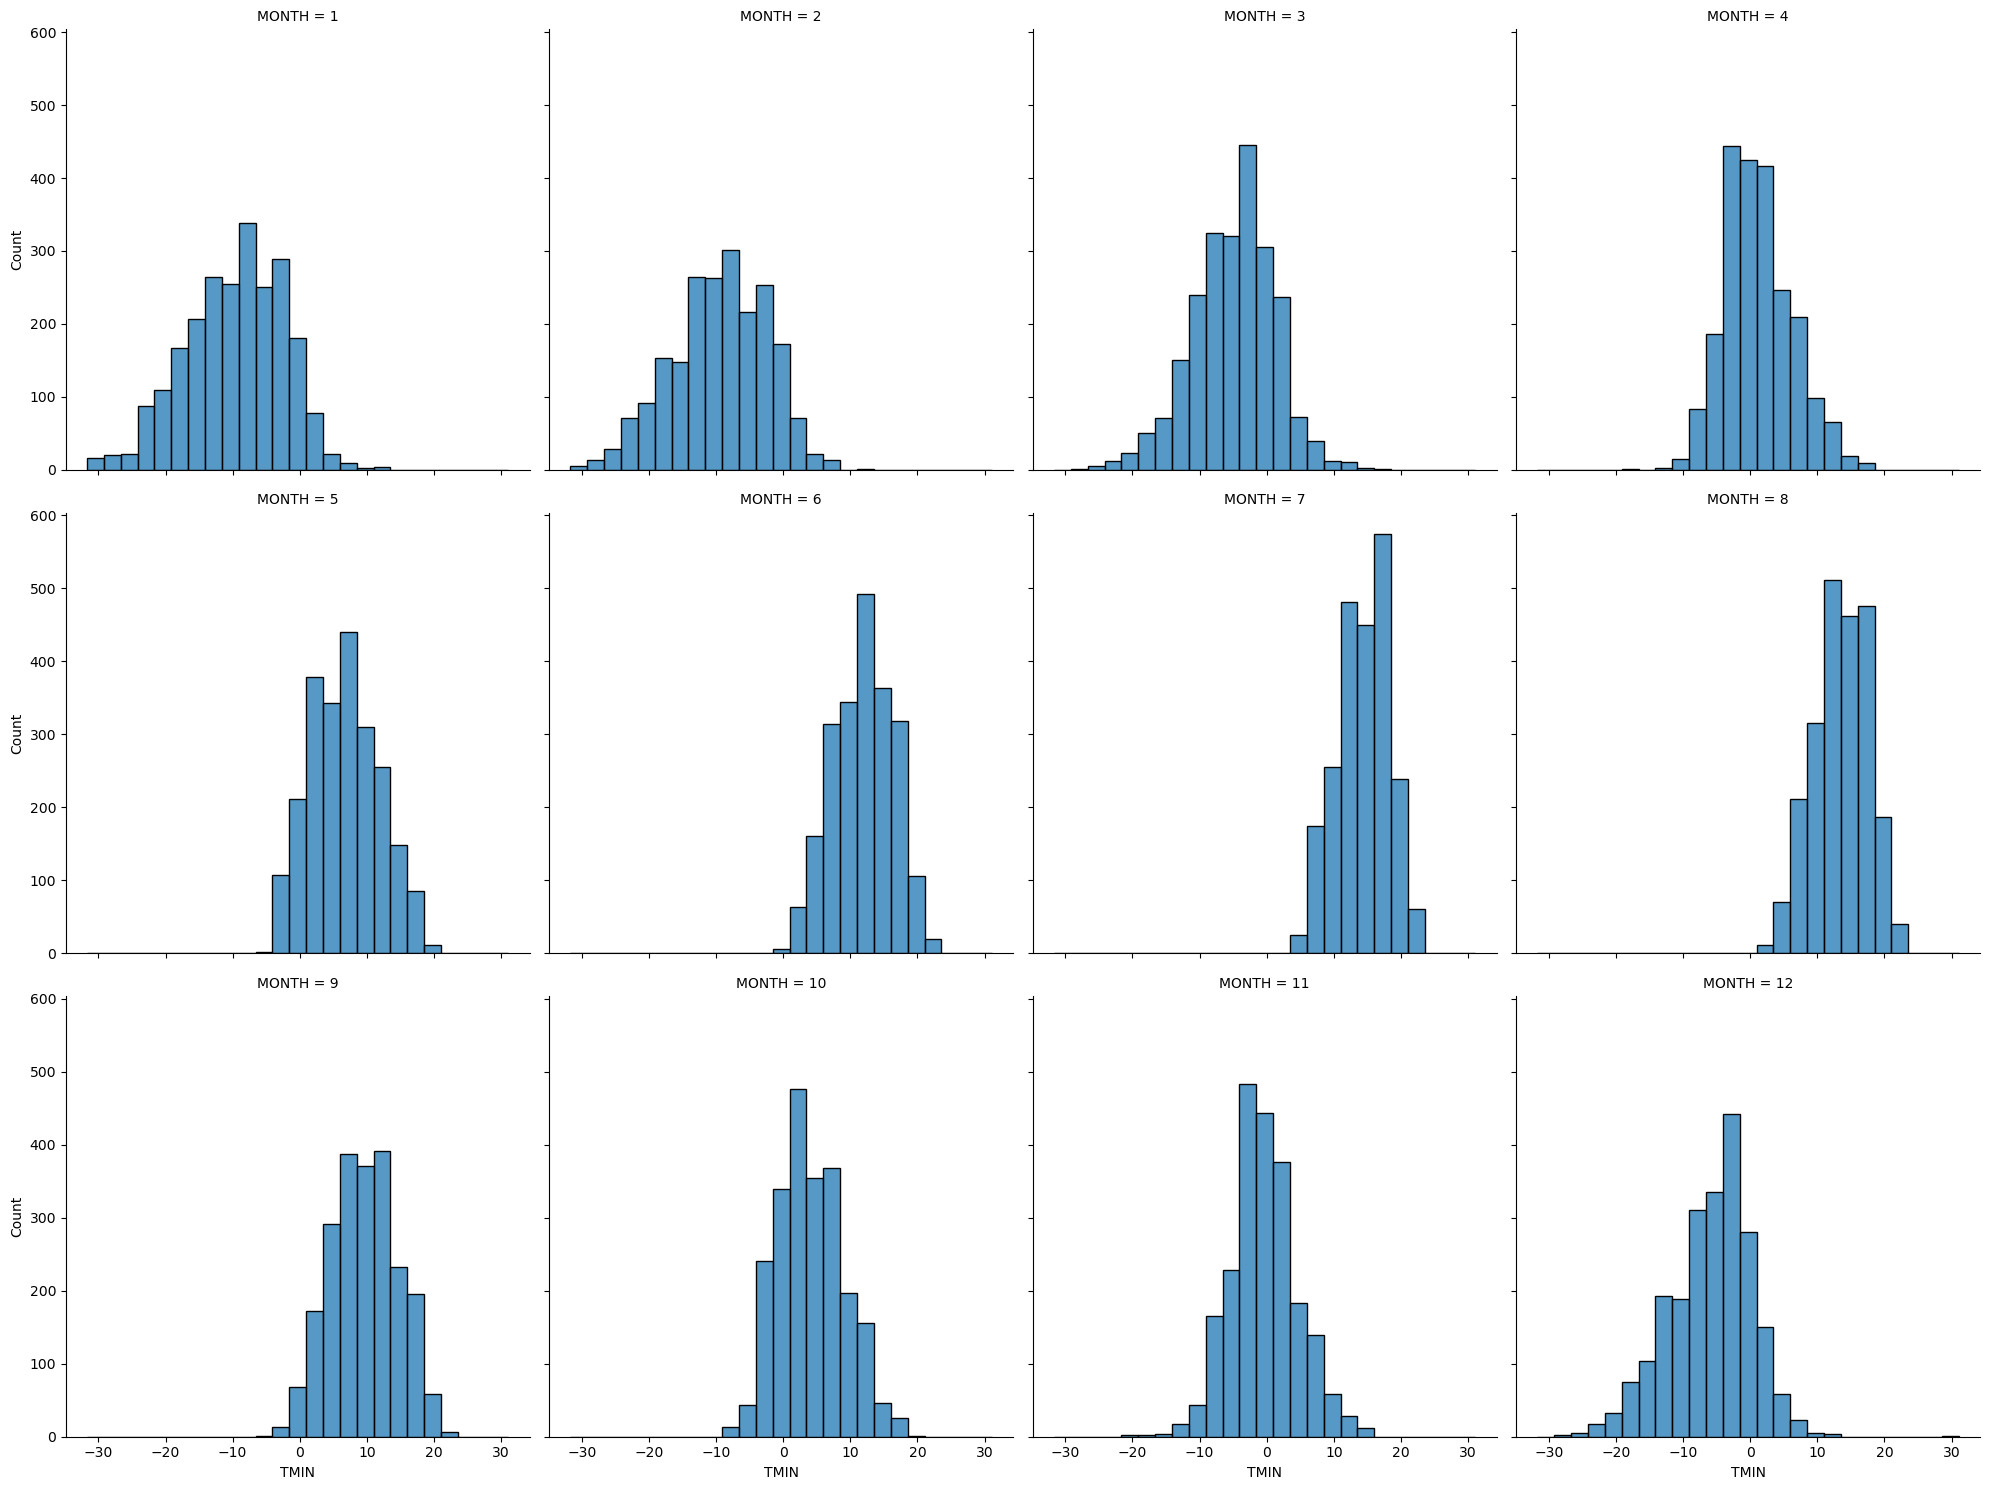

In [52]:
sns.displot(data=ithaca_data,x="TMIN",col="MONTH",col_wrap=4,kind="hist",bins=25)

plt.show()

In [44]:
#Label seasons
ithaca_data['season']=pd.cut(ithaca_data['MONTH'], [0,2,5,8,11,12],labels=["winter","spring","summer","fall","winter"],ordered=False)
#s =  pd.DataFrame({'x': np.arange(1,13,1)})
#s['y']=pd.cut(s['x'], [0,2,5,8,11,12],labels=["winter","spring","summer","fall","winter"],ordered=False)
#print(s)

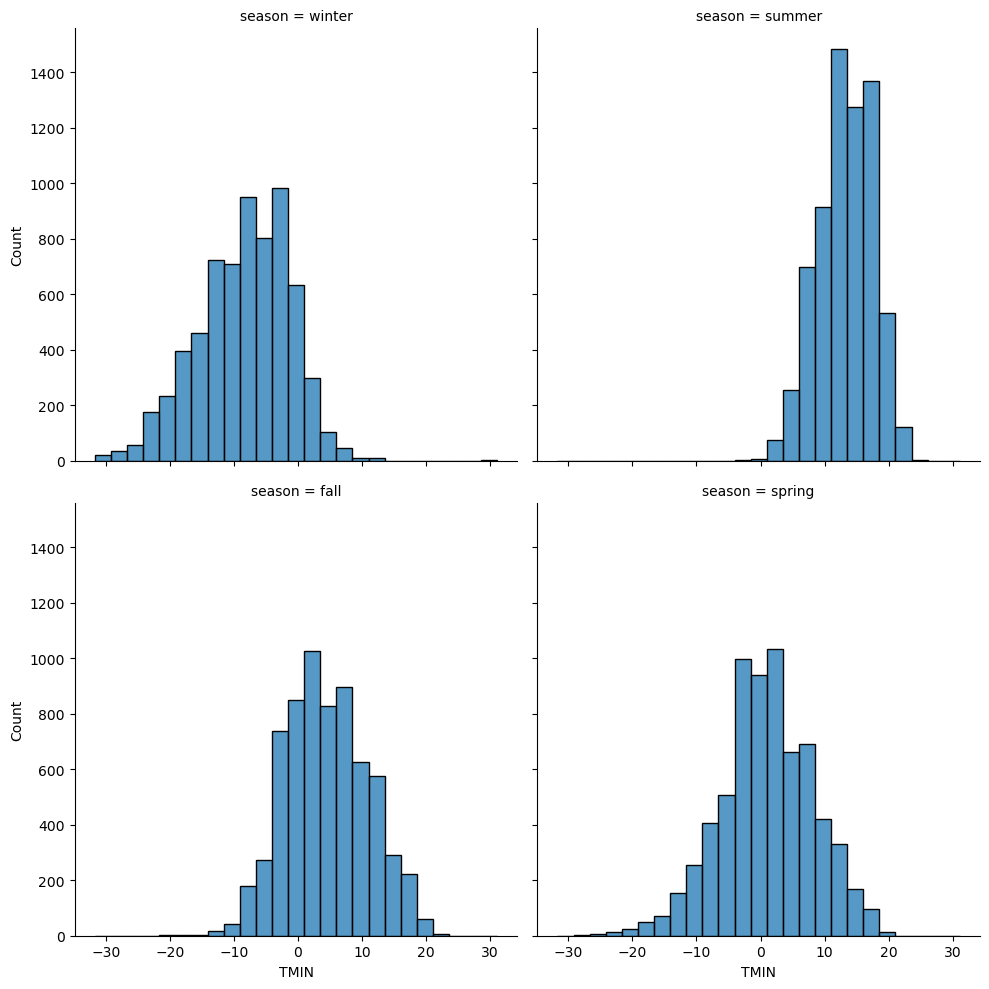

In [56]:
sns.displot(data=ithaca_data,x="TMIN",col="season",col_order=["winter","summer","fall","spring"],col_wrap=2,kind="hist",bins=25)

plt.show()

ValueError: No objects to concatenate

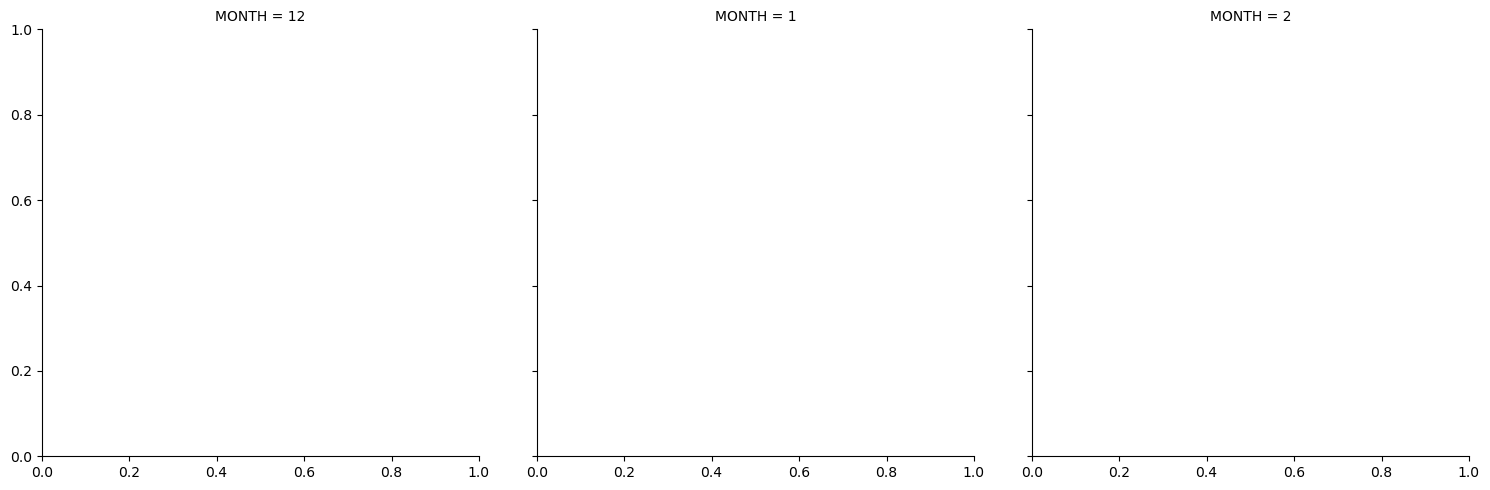

In [198]:
dwinter = ithaca_data[ithaca_data["season"]=="winter"]
sns.displot(data=dwinter,x="TMIN",col="MONTH",col_order=[12,1,2],col_wrap=3,kind="hist",bins=25)


In [61]:
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import gamma
from scipy.stats import t

In [199]:
#Moment Calculation
mean = np.round(np.mean(dwinter['TMIN']),2) #First moment
var = np.round(np.var(dwinter['TMIN']),2) #Second moment
min = np.round(np.min(dwinter['TMIN']),2)
max = np.round(np.max(dwinter['TMIN']),2)

print("First moment",mean,"C")
print("Second moment",var,"C")
print("Minimum",min,"C")
print("Maximum",max,"C")

First moment 0.96 C
Second moment 52.02 C
Minimum -27.2 C
Maximum 20.6 C


In [200]:
dwinter = dwinter.reset_index()
pos = np.argmax(dwinter["TMIN"])
print(pos)

5732


In [201]:
dwinter.loc[pos]

index                            22490
STATION                    USC00304174
DATE               2012-05-29 00:00:00
PRCP                               0.0
PRCP_ATTRIBUTES               ,,7,0700
SNOW                               0.0
SNOW_ATTRIBUTES                   ,,7,
TMAX                              31.7
TMAX_ATTRIBUTES                    ,,7
TMIN                              20.6
TMIN_ATTRIBUTES                    ,,7
YEAR                              2012
MONTH                                5
season                          spring
Name: 5732, dtype: object

In [202]:
dwinter["TMIN_ATTRIBUTES"].value_counts()

TMIN_ATTRIBUTES
,,0     5546
,,7     1288
,I,0       4
Name: count, dtype: int64

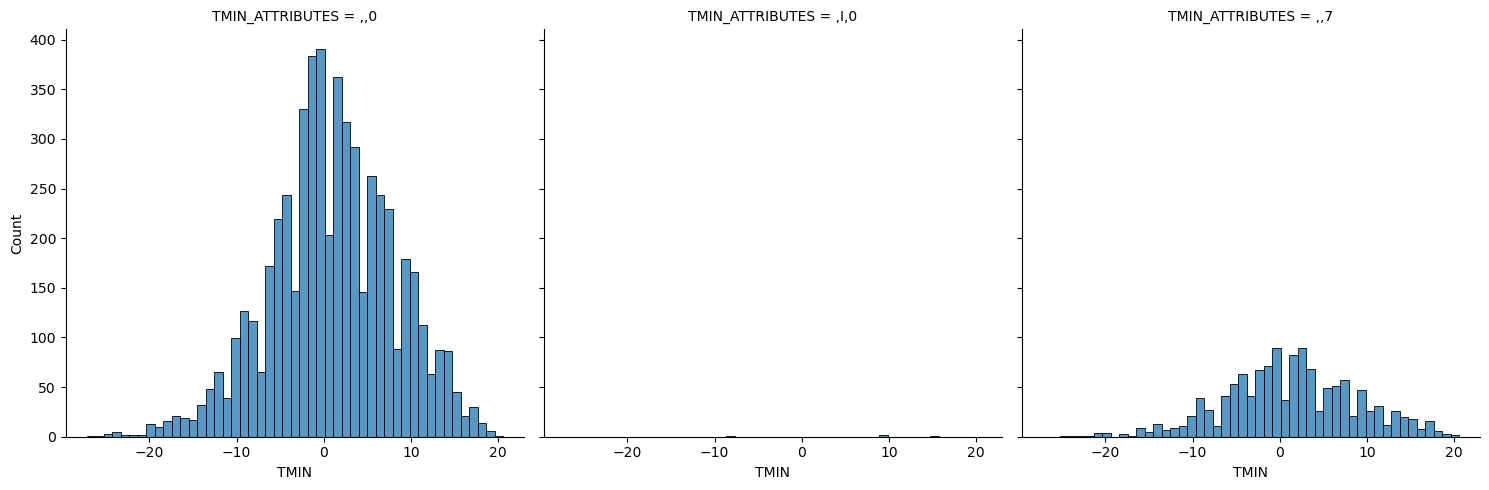

In [203]:
sns.displot(data=dwinter,x="TMIN",col="TMIN_ATTRIBUTES")


In [204]:
dwinter.TMIN_ATTRIBUTES = dwinter.TMIN_ATTRIBUTES.astype("category")

In [205]:
dwinter = dwinter[dwinter.TMIN_ATTRIBUTES.isin([',,0',',,7'])]
dwinter["TMIN_ATTRIBUTES"].value_counts()


TMIN_ATTRIBUTES
,,0     5546
,,7     1288
,I,0       0
Name: count, dtype: int64

In [206]:
#Moment Calculation
mean = np.round(np.mean(dwinter['TMIN']),2) #First moment
var = np.round(np.var(dwinter['TMIN']),2) #Second moment
min = np.round(np.min(dwinter['TMIN']),2)
max = np.round(np.max(dwinter['TMIN']),2)

print("First moment",mean,"C")
print("Second moment",var,"C")
print("Minimum",min,"C")
print("Maximum",max,"C")

First moment 0.96 C
Second moment 51.99 C
Minimum -27.2 C
Maximum 20.6 C


In [207]:
dwinter["TMIN_K"] = dwinter["TMIN"]+273.15


n =  6834


C:\Users\ls2236\AppData\Local\Temp\ipykernel_21736\732538277.py:26: RuntimeWarning: divide by zero encountered in log
  t_log_likelihood = np.sum(np.log(ts))


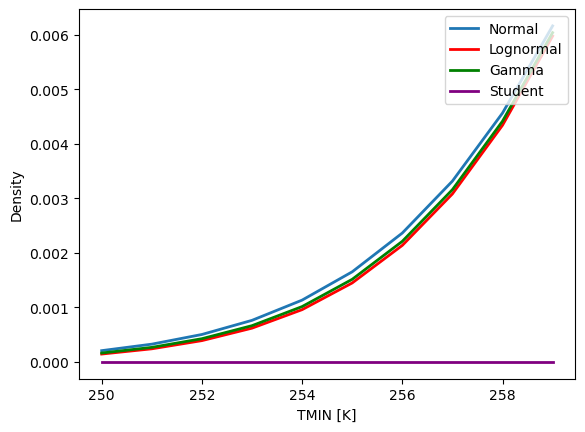

normal distribution: mean = 274.11  variance= 7.21  log-likelihood=  -23197.98
lognormal distribution: shape = 0.03  scale = 274.01  log-likelihood=  -23217.81
gamma distribution: shape = 1439.18  scale = 0.19  log-likelihood=  -23210.38
t-student distribution: shape = 224332632805.0  scale = 0.0  log-likelihood=  -inf


In [230]:

obs_data = dwinter["TMIN_K"]
n = np.size(obs_data)
print("n = ",n)
#Fit parameters
normal_fit = norm.fit(obs_data)
lognormal_fit = lognorm.fit(obs_data,floc=0)
gamma_fit = gamma.fit(obs_data,floc=0)
t_fit = t.fit(obs_data,floc=0)

#Create distributions
dist_norm = norm(normal_fit[0],normal_fit[1])
dist_lognorm = lognorm(lognormal_fit[0],lognormal_fit[1],lognormal_fit[2])
dist_gamma = gamma(gamma_fit[0],gamma_fit[1],gamma_fit[2])
dist_t = gamma(t_fit[0],t_fit[1],t_fit[2])

#Create pdfs for each distribution using fitted parameters
p = dist_norm.pdf(obs_data)
ln = dist_lognorm.pdf(obs_data)
gm = dist_gamma.pdf(obs_data)
ts = dist_t.pdf(obs_data)

#Calculate log-likelihood of each distribution
normal_log_likelihood = np.sum(np.log(p))
lognormal_log_likelihood = np.sum(np.log(ln))
gamma_log_likelihood = np.sum(np.log(gm))
t_log_likelihood = np.sum(np.log(ts))

#Round to two decimal places
normal_log_likelihood = np.round(normal_log_likelihood,2)
lognormal_log_likelihood = np.round(lognormal_log_likelihood,2)
gamma_log_likelihood = np.round(gamma_log_likelihood,2)
t_log_likelihood = np.round(t_log_likelihood,2)
#Histogram
#x = np.arange(np.min(obs_data)-100,np.max(obs_data)+100,1)
x=np.arange(250,260,1)
p_plot = dist_norm.pdf(x)
ln_plot = dist_lognorm.pdf(x)
gm_plot = dist_gamma.pdf(x)
ts_plot = dist_t.pdf(x)

#dwinter['TMIN_K'].hist(density=True,label="observations",bins=25)
plt.plot(x,p_plot,  linewidth=2,label="Normal")
plt.plot(x,ln_plot,  linewidth=2,color="red",label="Lognormal")
plt.plot(x,gm_plot, linewidth=2,color="green",label="Gamma")
plt.plot(x,ts_plot, linewidth=2,color="purple",label="Student")
plt.legend(loc="upper right")
plt.xlabel("TMIN [K]")
plt.ylabel("Density")
plt.show()
#Round fitted parameters
normal_fit = np.round(normal_fit,2)
lognorm_fit = np.round(lognormal_fit,2)
gamma_fit = np.round(gamma_fit,2)
t_fit = np.round(t_fit,2)

#Print results
print("normal distribution: mean =",normal_fit[0]," variance=",normal_fit[1]," log-likelihood= ",normal_log_likelihood)
print("lognormal distribution: shape =",lognorm_fit[0]," scale =" ,lognorm_fit[2]," log-likelihood= ",lognormal_log_likelihood)
print("gamma distribution: shape =",gamma_fit[0]," scale =",gamma_fit[2]," log-likelihood= ",gamma_log_likelihood)
print("t-student distribution: shape =",t_fit[0]," scale =",t_fit[1]," log-likelihood= ",t_log_likelihood)

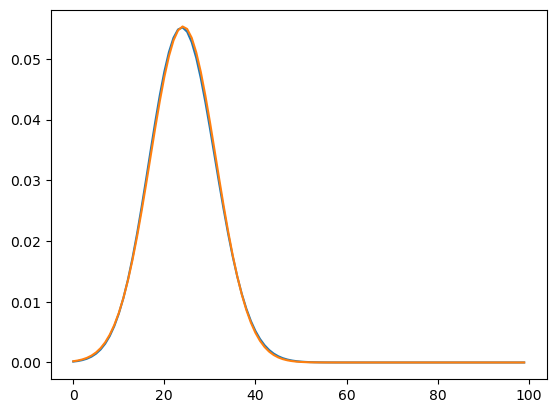

In [224]:
x=np.arange(250,350,1)
distln=lognorm(0.03,0,274.01)
distln = lognorm(lognormal_fit[0],lognormal_fit[1],lognormal_fit[2])
distn=norm(274.11,7.21)
plt.plot(distln.pdf(x))
plt.plot(distn.pdf(x))